In [16]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline


X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,69:-1] #only taking last 38 binary features

[Xtr, Xva, Ytr, Yva] = ml.splitData(X,Y,0.70) #70% training, 30% validation

FEATURES = 38

#Create a 2D array for all the data
data = np.zeros((len(Xtr[0]),len(Xtr)+1))

assert len(Ytr) == 5196 # verify our Y is 70% of 7423, which is 5196


p_read = np.count_nonzero(Ytr == 1) / len(Ytr)
p_not_read = np.count_nonzero(Ytr == 0) / len(Ytr)

entropy_y = - p_read * np.log(p_read) - p_not_read * np.log(p_not_read)

print(f"entropy = {entropy_y}")

[[8.330e+02 0.000e+00 4.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.472e+03 7.000e+00 6.200e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.316e+03 7.000e+00 1.620e+03 ... 1.000e+00 1.000e+00 1.000e+00]
 ...
 [2.310e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.785e+03 1.400e+01 3.324e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.380e+02 7.000e+00 1.356e+03 ... 0.000e+00 0.000e+00 0.000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
entropy = 0.6930615434618173


# MaxDepth Learners

In [21]:
#Playing with maxDepth parameter

totalDepth = [i for i in range(50)]

errTrain = np.zeros(len(totalDepth))
errVal = np.zeros(len(totalDepth))

for depth in totalDepth:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=depth)
    
    # Make predictions and calc error
    errTrain[depth] = learner.err(Xtr, Ytr)
    errVal[depth] = learner.err(Xva, Yva)

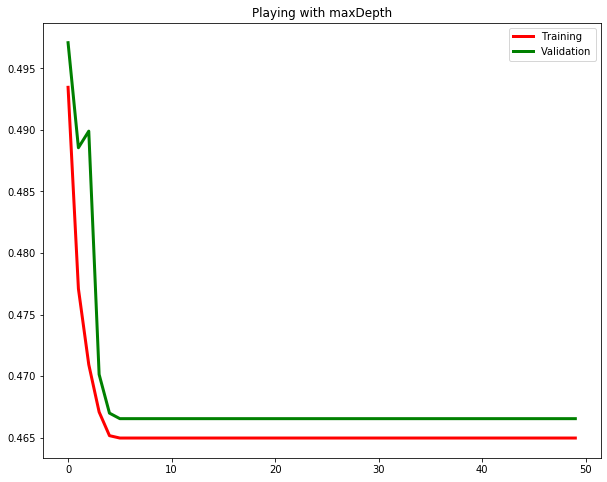

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(totalDepth, errTrain, 'r-', lw=3, label='Training')
ax.plot(totalDepth, errVal, 'g-', lw=3, label='Validation')
ax.set_title('Playing with maxDepth')

ax.legend()

plt.show()

Looks like anything after 5 is the lowest

# totalParent Learners

In [27]:
# Playing with totalParent parameter

totalParent = [i for i in range(14)]

errTrain = np.zeros(len(totalParent))
errVal = np.zeros(len(totalParent))

for i in totalParent:
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=2**i)
    
    # Make predictions and calc error
    errTrain[i] = learner.err(Xtr, Ytr)
    errVal[i] = learner.err(Xva, Yva)

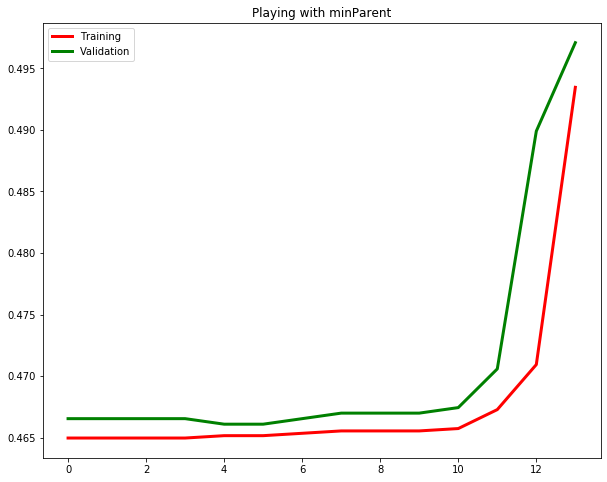

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(totalParent, errTrain, 'r-', lw=3, label='Training')
ax.plot(totalParent, errVal, 'g-', lw=3, label='Validation')
ax.set_title("Playing with minParent")

ax.legend()

plt.show()

The lowest validation error seems to be from 4 to 5 

# minLeaf Learners

In [29]:
# Playing with minLeaf Parameters
# parent 500 leaf 5 depth 100

# Playing with totalParent parameter
totalParent = [i+50 for i in range(100)]

errTrain = np.zeros(100)
errVal = np.zeros(100)

for i in totalParent:
    learner = ml.dtree.treeClassify(Xtr, Ytr, minLeaf=i)
    
    # Make predictions and calc error
    errTrain[i-50] = learner.err(Xtr, Ytr)
    errVal[i-50] = learner.err(Xva, Yva)

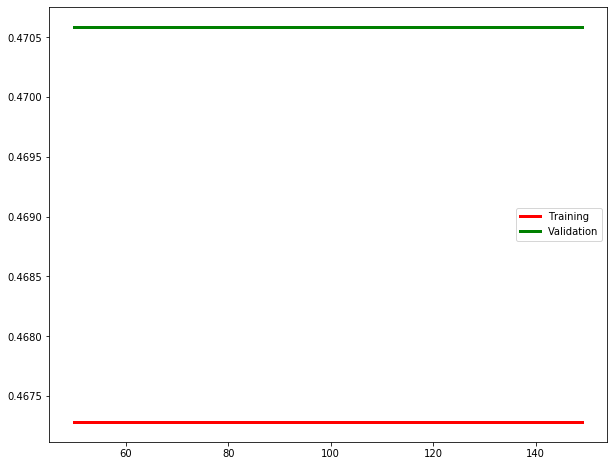

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(totalParent, errTrain, 'r-', lw=3, label='Training')
ax.plot(totalParent, errVal, 'g-', lw=3, label='Validation')

ax.legend()

plt.show()

Doesn't matter what the minimum leaves are. 

# Final Learner

In [39]:
# Use all the best points

learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=16, minLeaf=50, maxDepth=10)

print("Training AUC:  ", learner.auc(Xtr, Ytr))
print("Validation AUC:", learner.auc(Xva, Yva))

#P: Doesn't seem too hot for this set of features chief

Training AUC:   0.5491640448292704
Validation AUC: 0.5281858949541877
